# **Model Building**

In [1]:
img_size = [227,227] #List which stores the resolution
main_train = '../input/crack-detection/Main/Train' #Stores the path of the train directory
main_test = '../input/crack-detection/Main/Test' #Stores the path of the test directory

In [2]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2021-10-21 07:50:56.307154: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
vgg_model = VGG16(include_top=False,
    weights="imagenet",
    input_shape=img_size + [3])

# Loading the VGG16 pre trained model

# include_top - this specifies whether the final layer before the output layer has to be include 
# or not. If included then there will be 1000 number of classes at the output.

# Weights are trained using imagenet

2021-10-21 07:51:00.324447: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-21 07:51:00.327520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-21 07:51:00.366762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-21 07:51:00.367419: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-21 07:51:00.367483: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-21 07:51:00.392777: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step


In [4]:
# To print the hidden layer summary of vgg model without top layer
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
# To fix the weights of the pre trained model
for lay in vgg_model.layers:
    lay.trainable = False

In [6]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# to list out number of folders in train and test folder
import os
folders_train1 = os.listdir(main_train)
print(len(folders_train1))

folders_test1 = os.listdir(main_test)
print(len(folders_test1))

2
2


In [8]:
#outputs the last layer
vgg_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [9]:
#inputs of the layer
vgg_model.input

<KerasTensor: shape=(None, 227, 227, 3) dtype=float32 (created by layer 'input_1')>

In [10]:
# Flatten() is used to convert the last layer to vector or as fully connected
x = Flatten(name="first_flatten")(vgg_model.output)
# Dense() layer is added such that it outputs only two classess 
# Softmax activation layer produces probabilities for different classess.
pred = Dense(2,activation='softmax')(x)
# Model() is used to group layers
model = Model(inputs=vgg_model.input,outputs=pred)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# **Image Augmentation**

In [11]:
#ImageDataGenerator is used to modify the train and test images w.r.t the properties mentioned
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

# flow_from_directory() is used to convert all the images in the specific directory
training_set = train_datagen.flow_from_directory(directory = main_train,
                                                 target_size = (227,227),
                                                 batch_size = 500,
                                                 )

test_set = test_datagen.flow_from_directory(directory = main_test,
                                                 target_size = (227,227),
                                                 batch_size = 500,
                                                 )

Found 32042 images belonging to 2 classes.
Found 7958 images belonging to 2 classes.


In [12]:
# Class_indices will display the respective class value
training_set.class_indices

{'Negative': 0, 'Positive': 1}

In [13]:
print(len(training_set))
print(len(test_set))

65
16


# **Model Fit**

In [14]:
# Loss function is used to find the errors or deviations in learning process
# Optimizer is used to optimize the input weights
# Metrics is used to measure the performance
model.compile(optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [15]:
# fit() is used to train the model 
# len(training_set) is 32042/500 = 65
# len(test_set) is 7958/500 = 16
mod = model.fit(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

2021-10-21 07:51:30.064965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-21 07:51:30.069105: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000194999 Hz


Epoch 1/2


2021-10-21 07:51:30.721225: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-21 07:51:31.634546: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-21 07:51:37.978309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-10-21 07:51:43.225052: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


65/65 [==============================] - 612s 9s/step - loss: 0.2733 - accuracy: 0.8761 - val_loss: 0.0375 - val_accuracy: 0.9912
Epoch 2/2
65/65 [==============================] - 427s 7s/step - loss: 0.0384 - accuracy: 0.9908 - val_loss: 0.0261 - val_accuracy: 0.9937


In [16]:
# To save the particular model in .h5 format
import tensorflow as tf
from tensorflow.keras.models import load_model
model.save('vggmodelfinal.h5') 

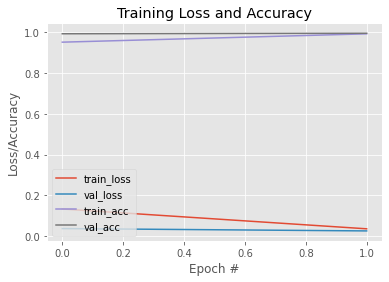

In [17]:
from matplotlib import pyplot as plt
N = 2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), mod.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), mod.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), mod.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), mod.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('grp.png')